In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sns.set(rc={'figure.figsize':(6,4)})

In [3]:
df_airbnb = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")


In [4]:
df_airbnb.head

<bound method NDFrame.head of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

         

In [5]:
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df_airbnb["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [8]:
df_airbnb["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Oda çeşitlerinin dağılımları')

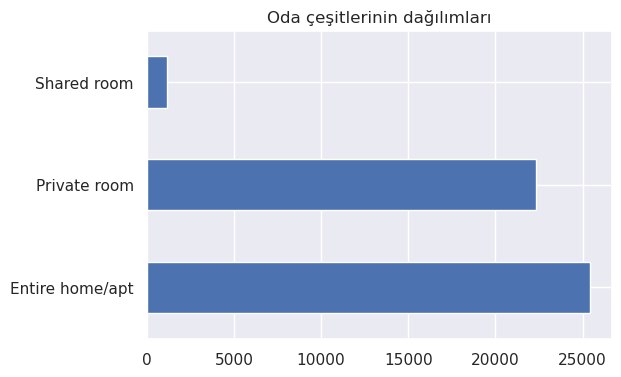

In [9]:
df_airbnb["room_type"].value_counts().plot.barh().set_title("Oda çeşitlerinin dağılımları")

Text(0.5, 1.0, 'Bölge çeşitlerinin dağılımları')

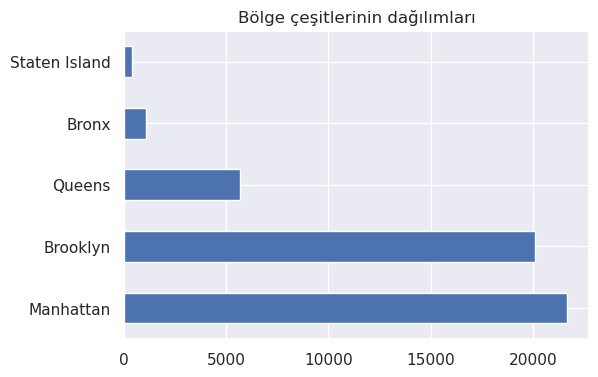

In [10]:
df_airbnb["neighbourhood_group"].value_counts().plot.barh().set_title("Bölge çeşitlerinin dağılımları")

In [11]:
custom_palette = {"Brooklyn": "red", "Manhattan": "green", "Queens": "blue", "Bronx": "orange", "Staten Island": "purple"}

Text(0.5, 1.0, 'Bölgelere Göre Fiyat Dağılımları (Ortalama)')

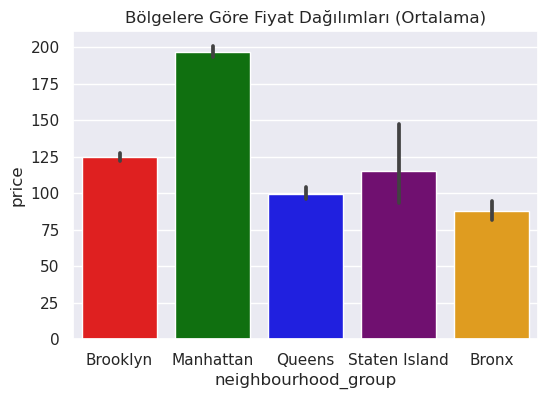

In [12]:
 sns.barplot(x="neighbourhood_group", y="price", data=df_airbnb, estimator=np.mean, palette=custom_palette).set_title("Bölgelere Göre Fiyat Dağılımları (Ortalama)")

Text(0.5, 1.0, 'Oda tiplerine Göre Ortalam Fiyat Dağılımları')

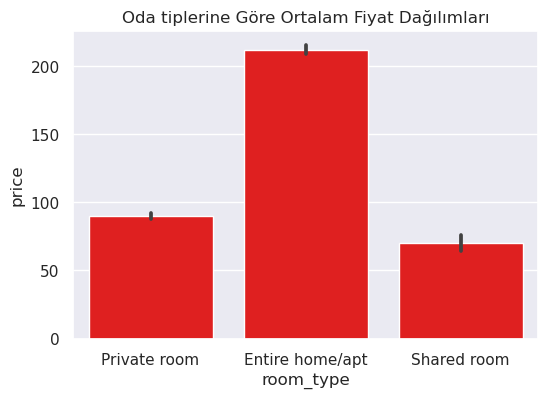

In [13]:
sns.barplot(x="room_type", y=df_airbnb["price"], data=df_airbnb, estimator=np.mean, color="red").set_title("Oda tiplerine Göre Ortalam Fiyat Dağılımları")

In [14]:
mean_values = df_airbnb.groupby(["neighbourhood_group", "room_type"])["price"].mean()
mean_values = mean_values.reset_index()

In [15]:
import plotly.express as px
fig = px.bar(mean_values, 
              x="neighbourhood_group",
              y="price",
              template="none",
              color="room_type",
              barmode="group",
              height=400, width=800, 
              color_discrete_map={"Entire home/apt":"#11a579", "Private room": "#7f3c8d",  "Shared room": "#3969ac"},
              category_orders={"room_type":["Entire home/apt", "Private room", "Shared room"],
                             "neighbourhood_group":["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]},
              labels={"count":"Airbnb Sayıları", "neighbourhood_group":"Bölgeler", "room_type":"Oda Tipi"},
              title="Bölge ve Oda Tiplerine Göre Ortalama Fiyat Dağılımları")
            
fig.show()

/tmp/ipykernel_20/767369215.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0.5, 1.0, 'Bölgelere göre fiyat oranları')

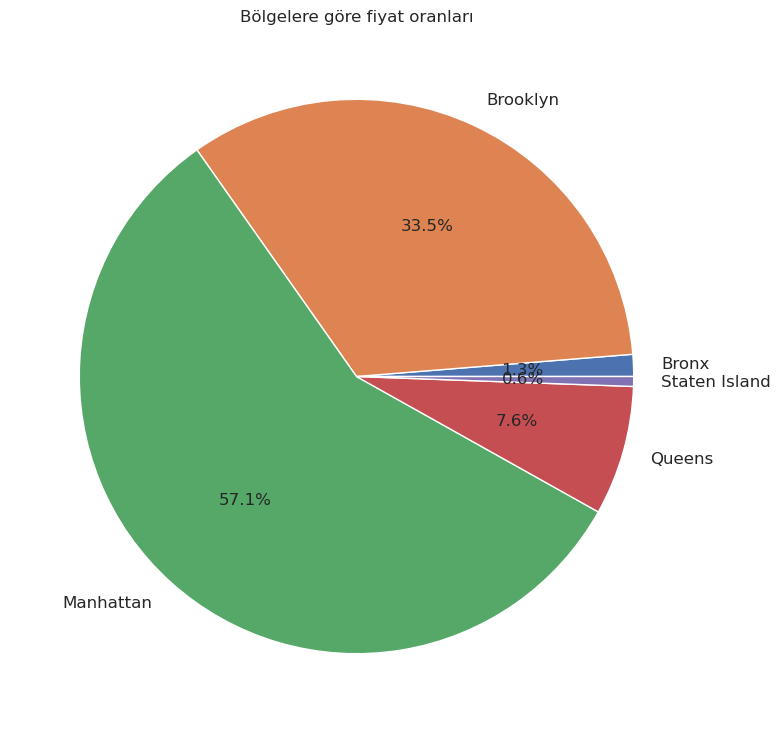

In [16]:
df_airbnb.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(9,9), textprops={'fontsize': 12}).set_title("Bölgelere göre fiyat oranları") 

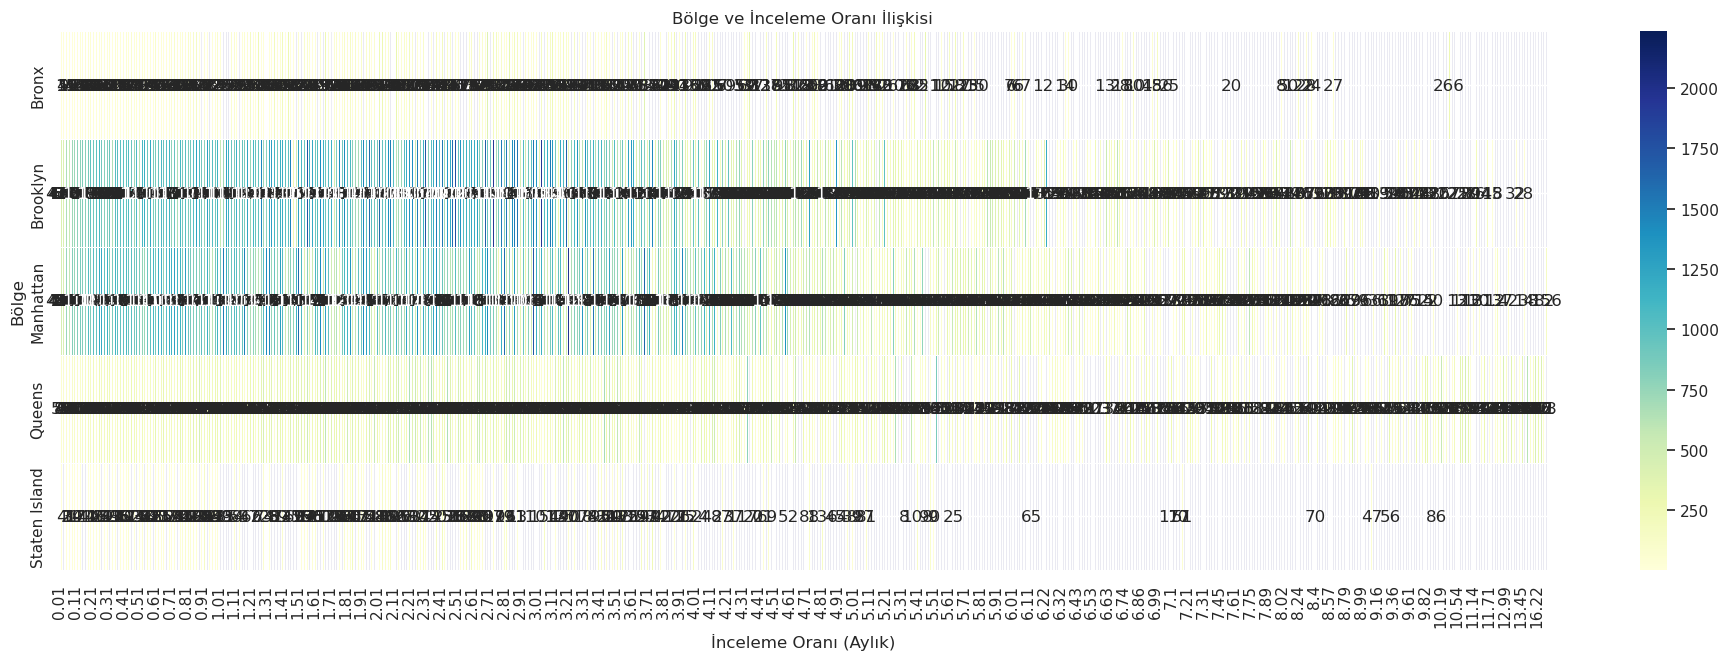

In [17]:
data = df_airbnb[['neighbourhood_group', 'number_of_reviews', 'reviews_per_month']]
heatmap_data = data.pivot_table(index='neighbourhood_group', columns='reviews_per_month', values='number_of_reviews', aggfunc='sum')
plt.figure(figsize=(24, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.xlabel('İnceleme Oranı (Aylık)')
plt.ylabel('Bölge')
plt.title('Bölge ve İnceleme Oranı İlişkisi')
plt.show()

In [18]:
def categorize_availability(availability):
    if availability < 50:
        return 'Düşük Müsaitlik'
    elif availability < 200:
        return 'Orta Müsaitlik'
    else:
        return 'Yüksek Müsaitlik'

In [19]:
df_airbnb['availability_category'] = df_airbnb['availability_365'].apply(categorize_availability)

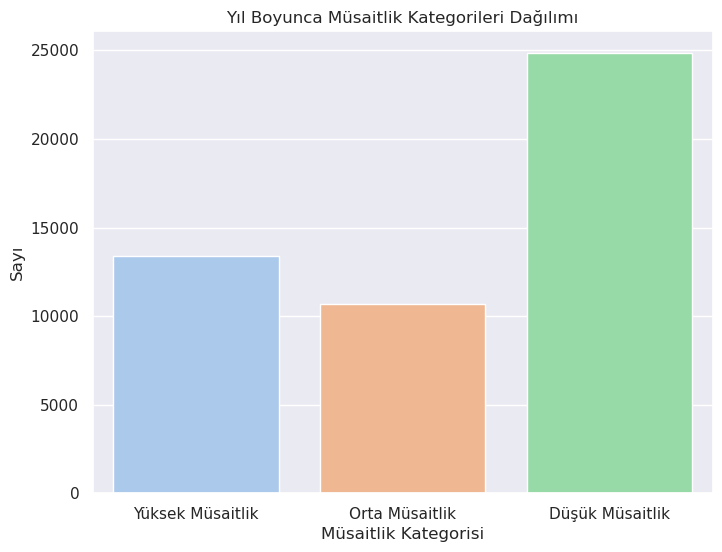

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='availability_category', data=df_airbnb, palette='pastel')
plt.xlabel('Müsaitlik Kategorisi')
plt.ylabel('Sayı')
plt.title('Yıl Boyunca Müsaitlik Kategorileri Dağılımı')
plt.show()

In [21]:
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Yüksek Müsaitlik
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Yüksek Müsaitlik
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Yüksek Müsaitlik
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Orta Müsaitlik
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Düşük Müsaitlik


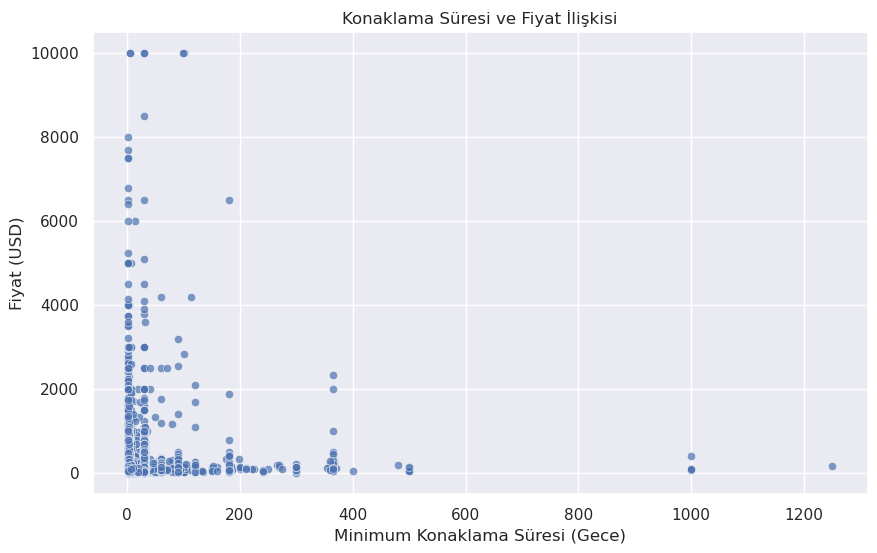

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_airbnb, x='minimum_nights', y='price', alpha=0.7)
plt.xlabel('Minimum Konaklama Süresi (Gece)')
plt.ylabel('Fiyat (USD)')
plt.title('Konaklama Süresi ve Fiyat İlişkisi')
plt.show()

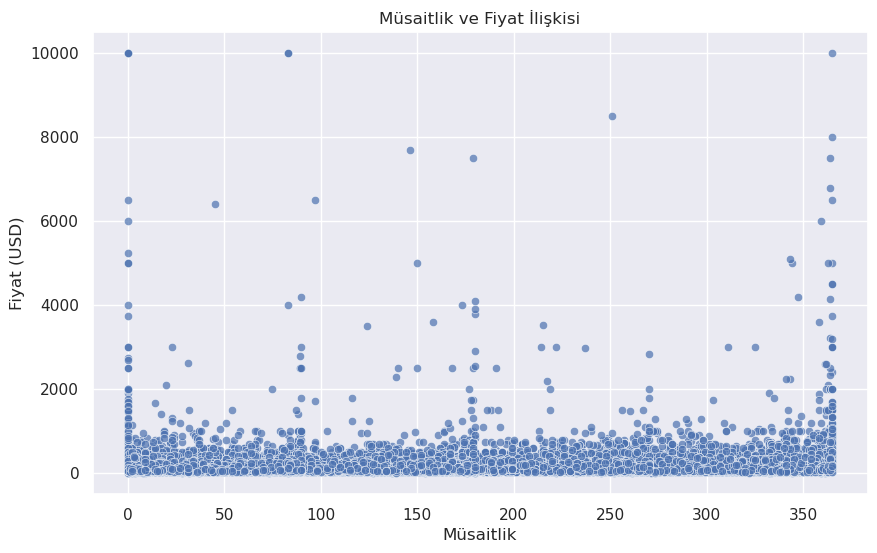

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_airbnb, x='availability_365', y='price', alpha=0.7)
plt.xlabel('Müsaitlik')
plt.ylabel('Fiyat (USD)')
plt.title('Müsaitlik ve Fiyat İlişkisi')
plt.show()

Text(0.5, 0, 'Bölge')

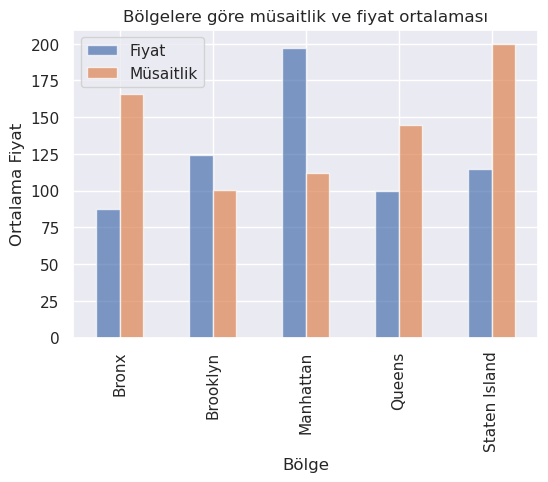

In [24]:
df_airbnb.groupby('neighbourhood_group').agg({'price':'mean','availability_365':'mean'}).plot.bar(alpha=0.7).set_title("Bölgelere göre müsaitlik ve fiyat ortalaması")
plt.legend(['Fiyat','Müsaitlik'])
plt.ylabel('Ortalama Fiyat')
plt.xlabel('Bölge')

Text(0.5, 1.0, 'Bölgelere göre oda tipleri ve fiyat dağılımları')

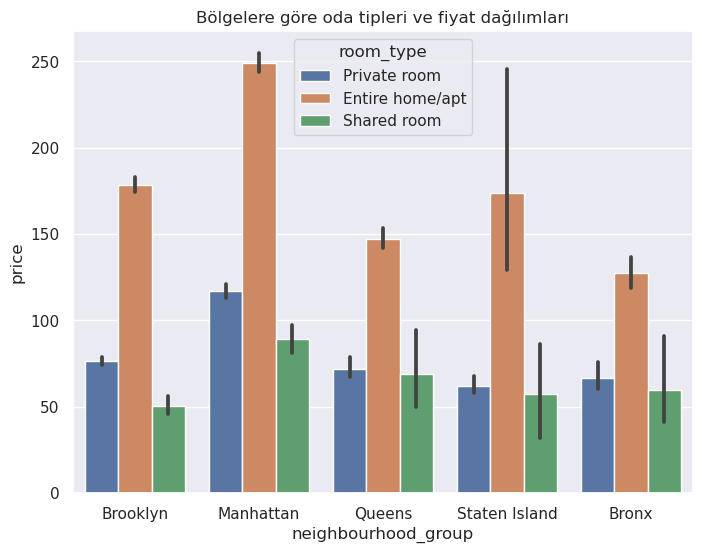

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df_airbnb['neighbourhood_group'],y=df_airbnb['price'],hue=df_airbnb['room_type'])
plt.title("Bölgelere göre oda tipleri ve fiyat dağılımları")

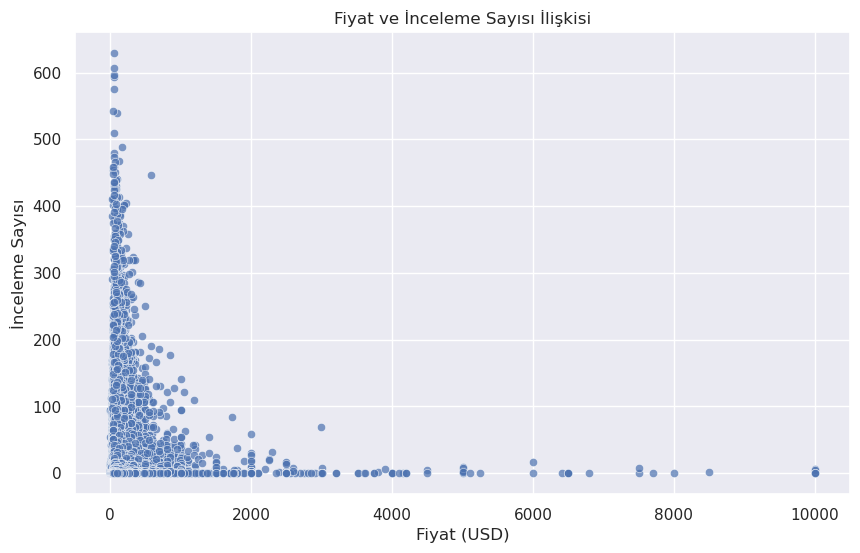

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_airbnb, x='price', y='number_of_reviews', alpha=0.7)
plt.xlabel('Fiyat (USD)')
plt.ylabel('İnceleme Sayısı')
plt.title('Fiyat ve İnceleme Sayısı İlişkisi')
plt.show()

In [27]:
host_reviews_count = df_airbnb.groupby('host_name')['number_of_reviews'].sum().reset_index()

In [28]:
host_reviews_count = host_reviews_count.sort_values(by='number_of_reviews', ascending=False)

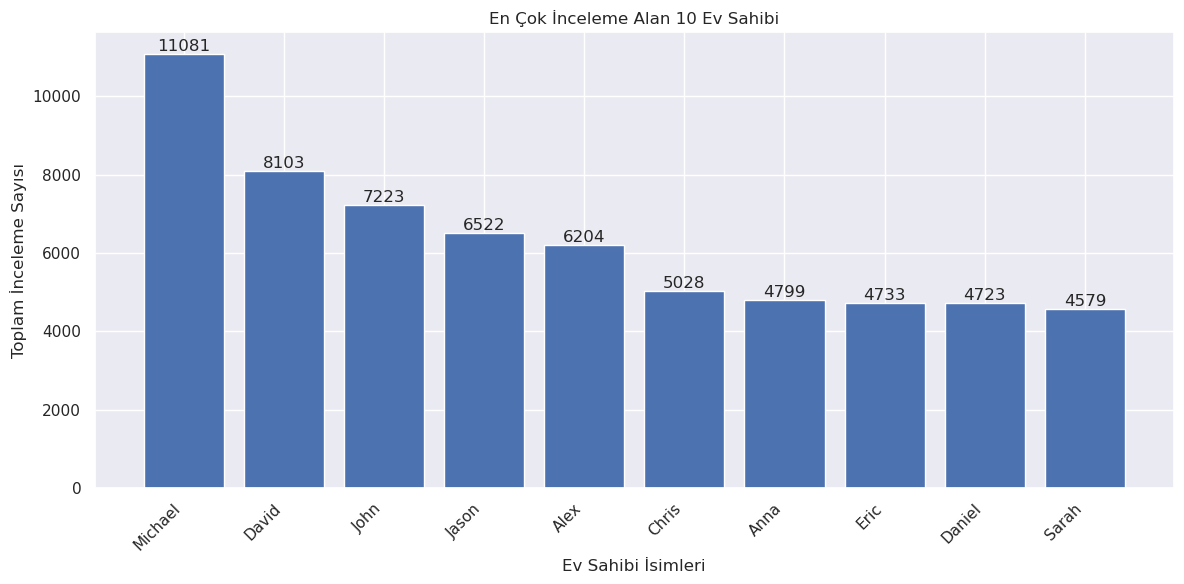

In [29]:
plt.figure(figsize=(12, 6))
bars = plt.bar(host_reviews_count['host_name'][:10], host_reviews_count['number_of_reviews'][:10])
plt.xlabel('Ev Sahibi İsimleri')
plt.ylabel('Toplam İnceleme Sayısı')
plt.title('En Çok İnceleme Alan 10 Ev Sahibi')
plt.xticks(rotation=45, ha='right')

# Değerleri barların üzerine yazdırma
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [30]:
grouped_data = df_airbnb.groupby('neighbourhood_group')['number_of_reviews'].sum()


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Manhattan'),
  Text(3, 0, 'Queens'),
  Text(4, 0, 'Staten Island')])

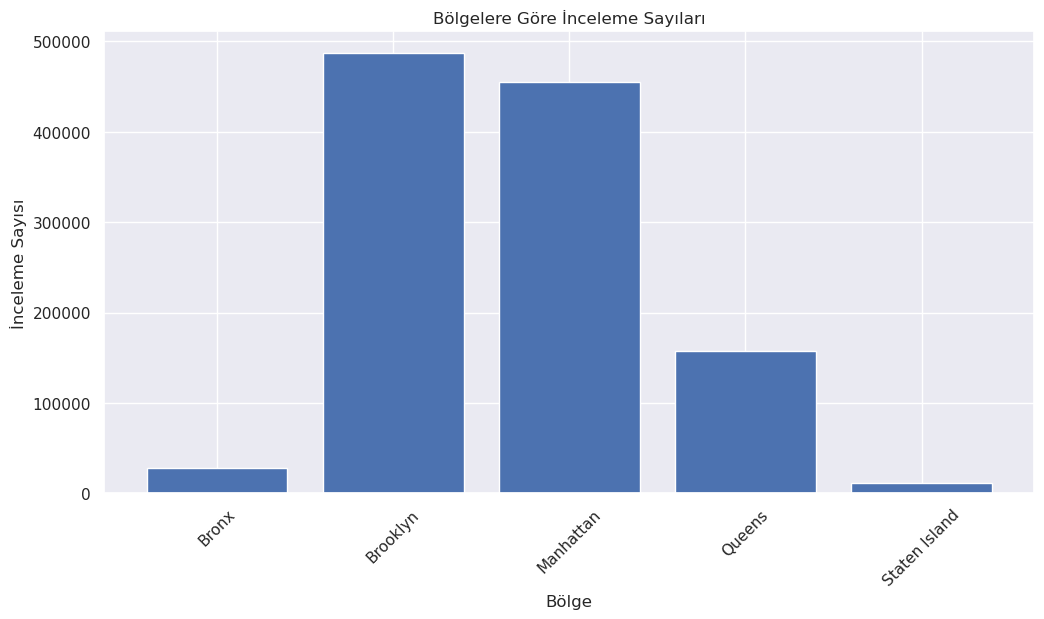

In [31]:
plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Bölge')
plt.ylabel('İnceleme Sayısı')
plt.title('Bölgelere Göre İnceleme Sayıları')
plt.xticks(rotation=45)



/tmp/ipykernel_20/597526824.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



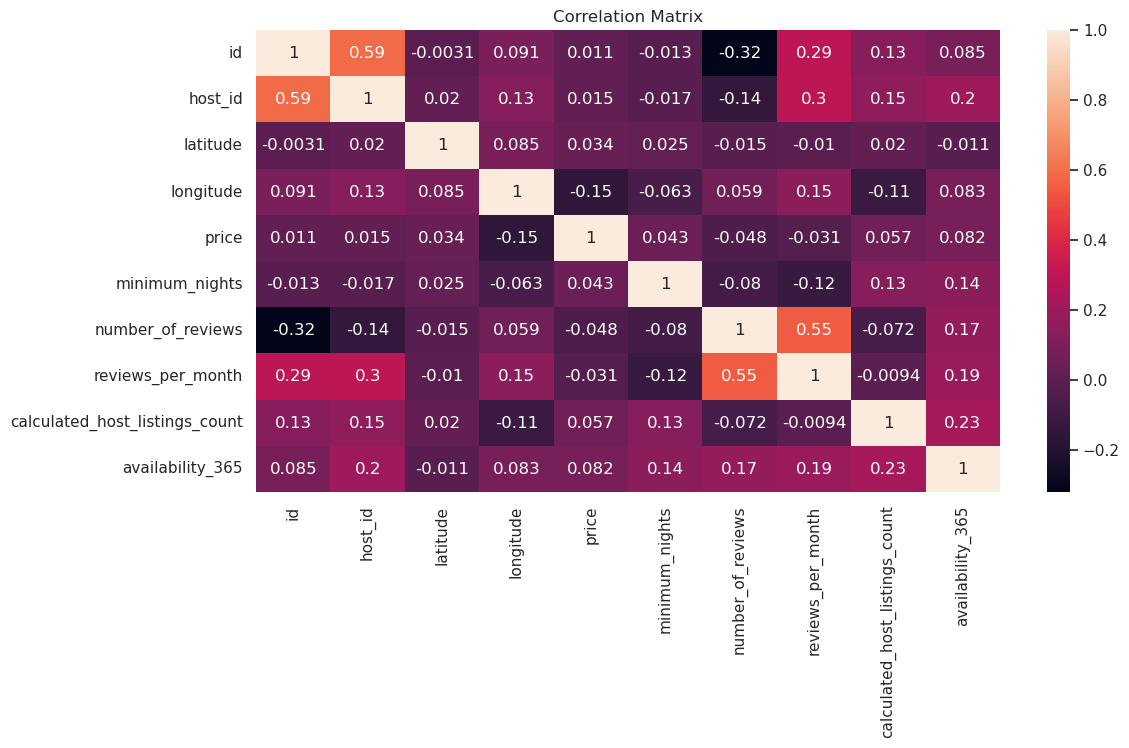

In [32]:
plt.figure(figsize=(12, 6))
plt.title("Correlation Matrix")
sns.heatmap(df_airbnb.corr(), annot=True);

In [33]:
import geopandas as gpd

/tmp/ipykernel_20/188095396.py:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')




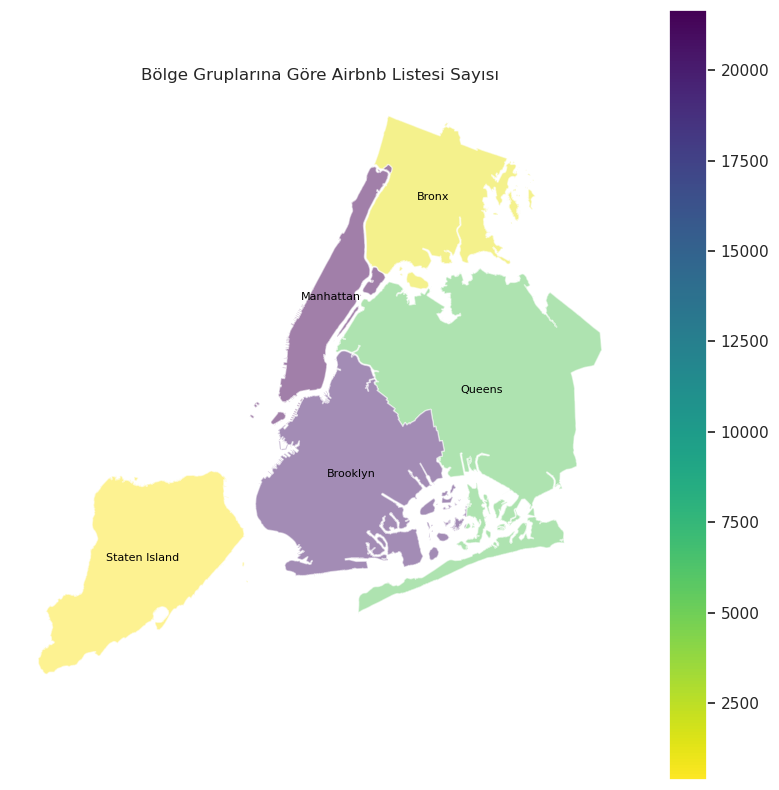

In [34]:
# 'neighbourhood_count' veri çerçevesini oluşturma('neighbourhood_group' ve 'id' sütunlarından)
mahalle_grup_sayisi = data['neighbourhood_group'].value_counts().reset_index()
mahalle_grup_sayisi.columns = ['Bölge', 'id']

# New York City ilçelerinin şekil dosyasını yükleme
nyc_ilceler = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc_ilceler.rename(columns={'BoroName':'Bölge'}, inplace=True)

# Mahalle grup sayıları veri çerçevesini ilçe şekil dosyasıyla birleştirme
bc_geo = nyc_ilceler.merge(mahalle_grup_sayisi, on='Bölge')

# Mahalle gruplarına göre Airbnb listelerinin sayısını gösteren bir harita oluşturma
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bc_geo.plot(column='id', cmap='viridis_r', alpha=0.5, ax=ax, legend=True)

# Harita üzerinde mahalle gruplarının Türkçe adlarını ekleme
bc_geo.apply(lambda x: ax.annotate(
    text=x.Bölge,
    color='black',
    xy=x.geometry.centroid.coords[0],
    ha='center',
    fontsize=8),
    axis=1)

plt.title("Bölge Gruplarına Göre Airbnb Listesi Sayısı")
plt.axis('off')
plt.show()